# Model calibration example

Imports

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


data

In [3]:
# Load a sample dataset
X, y = datasets.make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model training and calibration

Uncalibrated model - calibration MSE: 0.012
Calibrated model - calibration MSE: 0.010


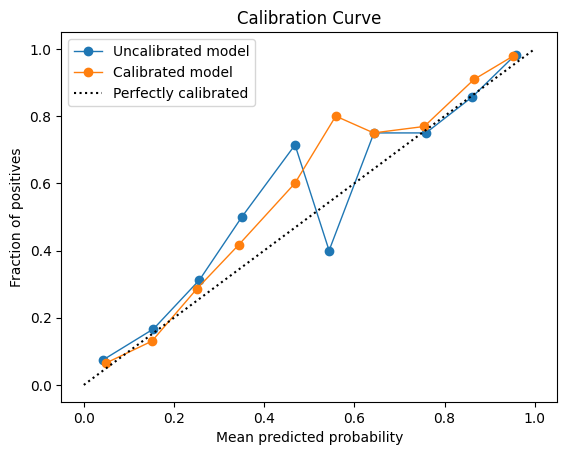

In [7]:
# Train a Support Vector Classifier
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

# Calibrate the model on the test data
calibrated_model = CalibratedClassifierCV(estimator=model, method='sigmoid')

calibrated_model.fit(X_train, y_train)

# plotting
for model, model_name in zip([model, calibrated_model], ['Uncalibrated model', 'Calibrated model']):
    pred = model.predict_proba(X_test)[:, 1]


    # Create calibration curve
    prob_true, prob_pred_mean = calibration_curve(y_test, pred, n_bins=10)

    # Fit a linear regression model to the calibration curve


    # Create calibration plot
    plt.plot(prob_pred_mean, prob_true, marker='o', linewidth=1, label= model_name)
    # Optional: Calculate the mean squared error of the calibration
    mse = mean_squared_error(prob_true, prob_pred_mean.reshape(-1, 1))
    print(f'{model_name:} - calibration MSE: {mse:.3f}')
# Add labels and legend
_ = plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
_ = plt.xlabel('Mean predicted probability')
_ = plt.ylabel('Fraction of positives')
_ = plt.title('Calibration Curve')
_ = plt.legend()
